<a href="https://colab.research.google.com/github/amerelfalwo/-AI-_projects/blob/main/spam_email_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [7]:
data = pd.read_csv('mail_data.csv')
data.head(

)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


data['Category'] = le.fit_transform(data['Category'])
data.head()


,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
data.isnull().sum()

,0
Category,0
Message,0


In [10]:
data.duplicated().sum()

np.int64(415)

In [11]:
data.drop_duplicates( keep ='first')

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
data['Category'].value_counts()

,count
Category,
0,4825
1,747


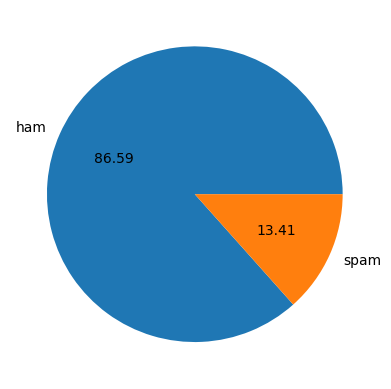

In [13]:
import matplotlib.pyplot as plt

plt.pie(data['Category'].value_counts() , labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [14]:
import nltk

In [15]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [16]:
data['num_characters'] = data['Message'].apply(len)

In [17]:
data['num_word'] = data['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [18]:
data['num_sentax'] = data['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [19]:
data.head()

,Category,Message,num_characters,num_word,num_sentax
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Category        5572 non-null   int64 
 1   Message         5572 non-null   object
 2   num_characters  5572 non-null   int64 
 3   num_word        5572 non-null   int64 
 4   num_sentax      5572 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 217.8+ KB


In [21]:
import seaborn as sns

<Figure size 1200x600 with 0 Axes>

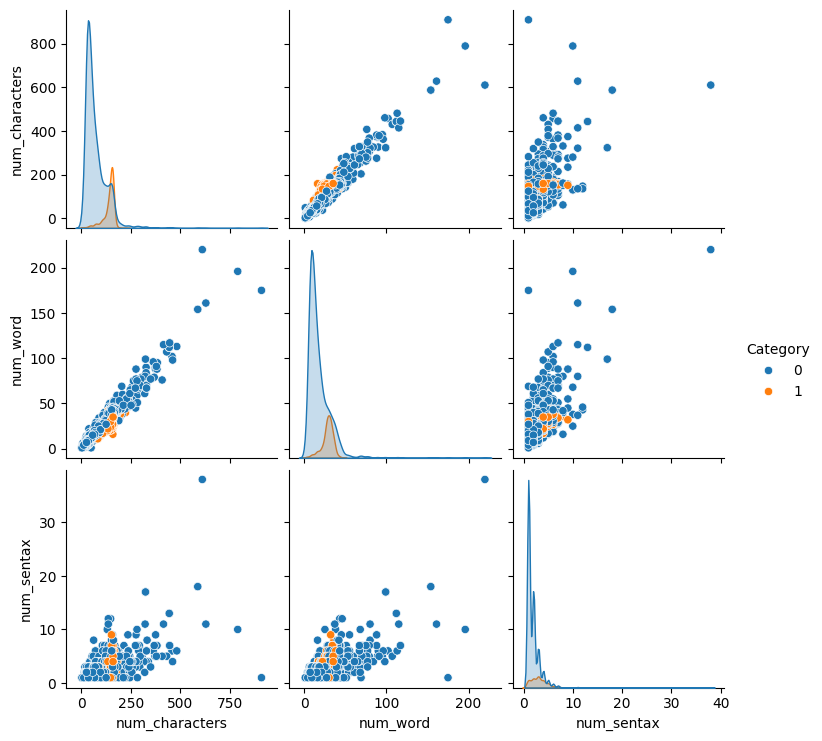

In [22]:
plt.figure(figsize=(12,6))
sns.pairplot(data, hue='Category')
plt.show()

<Axes: >

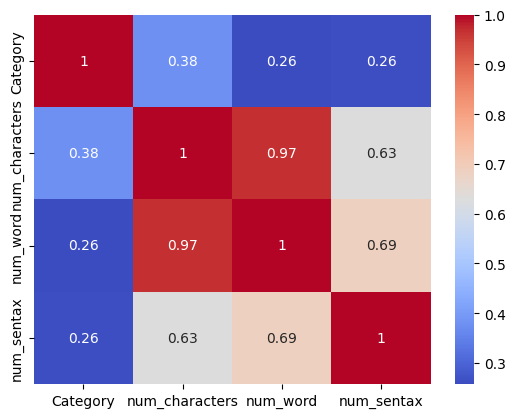

In [23]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="coolwarm")


In [24]:
import nltk, string
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

for pkg in ['punkt', 'stopwords', 'wordnet', 'omw-1.4', 'averaged_perceptron_tagger']:
    try:
        nltk.data.find(pkg)
    except LookupError:
        nltk.download(pkg, quiet=True)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
translator = str.maketrans('', '', string.punctuation)

def get_wordnet_pos(tag):
    if tag is None: return None
    if tag.startswith('J'): return wordnet.ADJ
    if tag.startswith('V'): return wordnet.VERB
    if tag.startswith('N'): return wordnet.NOUN
    if tag.startswith('R'): return wordnet.ADV
    return None

def text_transform(text):
    text = text.translate(translator)
    tokens = nltk.word_tokenize(text.lower())
    filtered = [w for w in tokens if w.isalnum() and w not in stop_words]
    try:
        tagged = nltk.pos_tag(filtered)
    except LookupError:
        tagged = [(w, None) for w in filtered]
    lemmatized = []
    for word, tag in tagged:
        wn_pos = get_wordnet_pos(tag)
        lemmatized.append(lemmatizer.lemmatize(word, wn_pos) if wn_pos else lemmatizer.lemmatize(word))
    return " ".join(lemmatized)

if __name__ == "__main__":
    s = "Hel::::lo world , I AM &$  playing"
    print(text_transform(s))


hello world playing


In [25]:
data['tranform_massg'] = data['Message'].apply(text_transform)
data.head()

,Category,Message,num_characters,num_word,num_sentax,tranform_massg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah dont think go usf life around though


In [26]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [27]:
spam_wc = wc.generate(data[data['Category']==1]['tranform_massg'].str.cat(sep=" "))


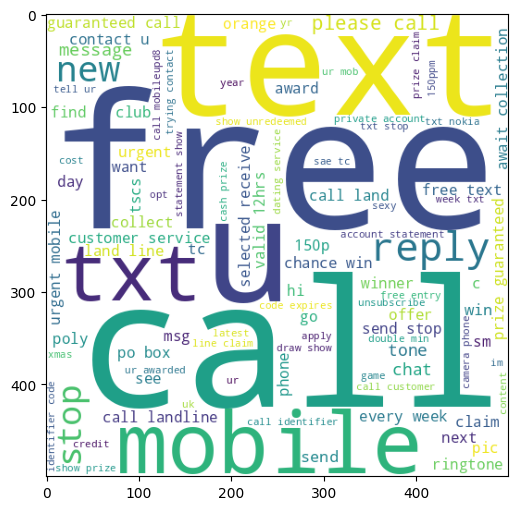

In [28]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [29]:
ham_wc = wc.generate(data[data['Category']==0]['tranform_massg'].str.cat(sep=" "))

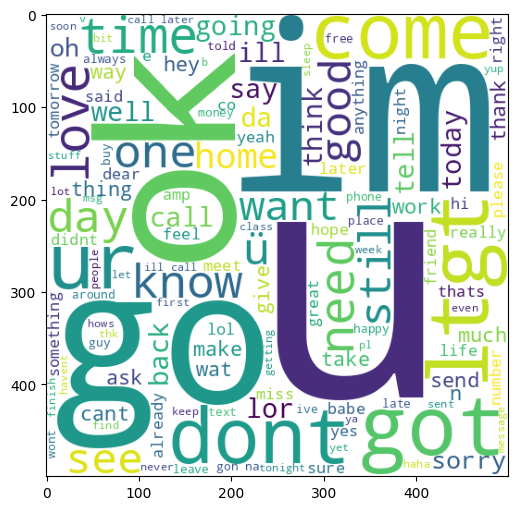

In [30]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [31]:
spam_list  = []

for mag in data[data['Category']==1]['tranform_massg'].tolist():
  for word in mag.split() :
    spam_list.append(word)

In [32]:
len(spam_list)

12178

/tmp/ipython-input-1410621325.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="word", y="count", data=df ,palette="viridis")


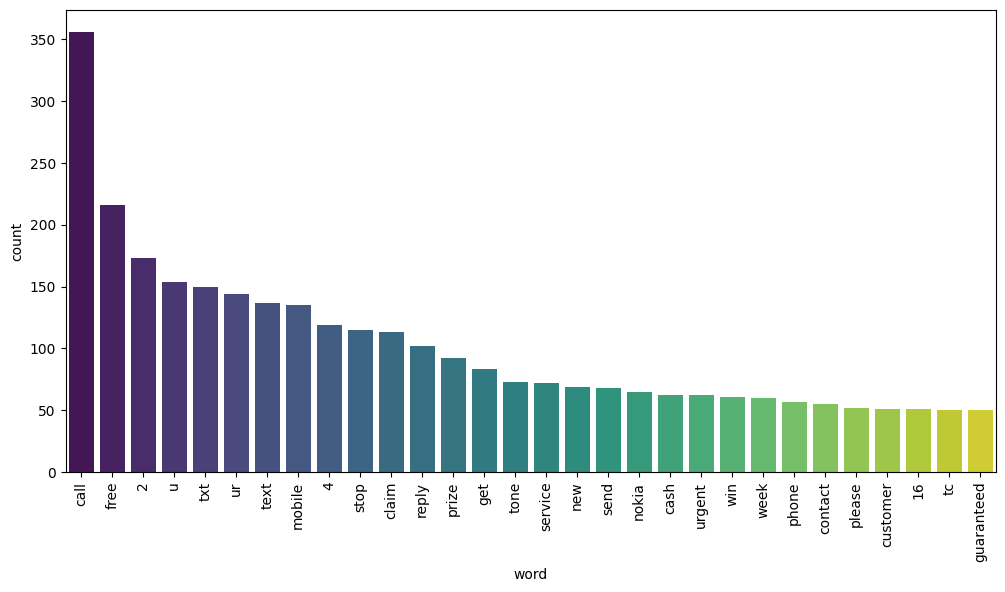

In [33]:
from collections import Counter

df = pd.DataFrame(Counter(spam_list).most_common(30), columns=["word", "count"])

plt.figure(figsize=(12,6))
sns.barplot(x="word", y="count", data=df ,palette="viridis")
plt.xticks(rotation=90)
plt.show()


In [34]:
ham_list  = []

for mag in data[data['Category']==0]['tranform_massg'].tolist():
  for word in mag.split() :
     ham_list.append(word)

In [35]:
len(ham_list)

40158

/tmp/ipython-input-734011196.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="word", y="count", data=df ,palette="viridis")


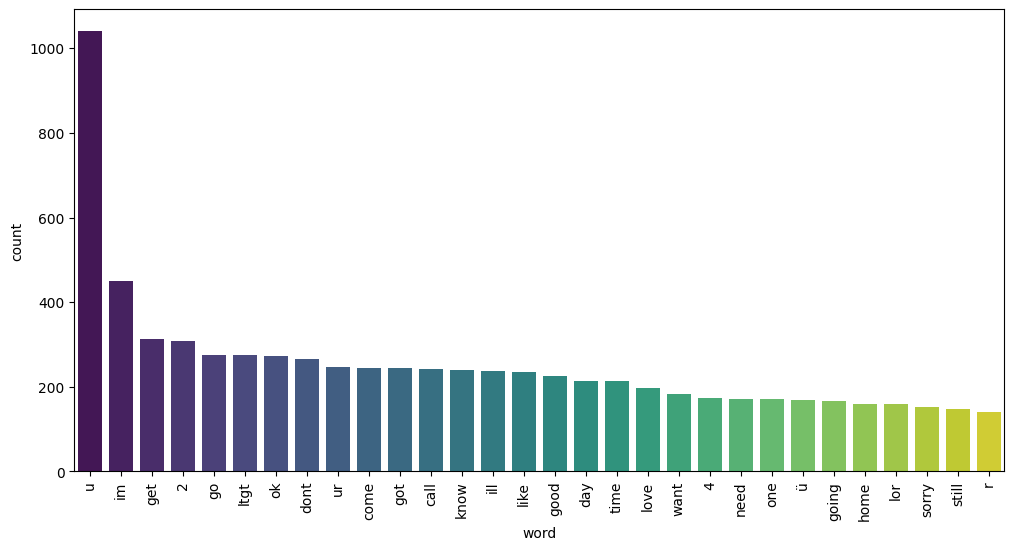

In [36]:
df = pd.DataFrame(Counter(ham_list).most_common(30), columns=["word", "count"])

plt.figure(figsize=(12,6))
sns.barplot(x="word", y="count", data=df ,palette="viridis")
plt.xticks(rotation=90)
plt.show()


In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer ,CountVectorizer
cv =CountVectorizer()
tf = TfidfVectorizer(max_features=3000)

In [38]:
x = tf.fit_transform(data['tranform_massg']).toarray()

In [42]:
y = data['Category'].values

In [43]:
x.shape

(5572, 3000)

In [40]:
from sklearn.model_selection import train_test_split

In [44]:
x_train ,x_test ,y_train ,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [45]:
from sklearn.naive_bayes import GaussianNB ,MultinomialNB ,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [50]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8663677130044843
[[830 127]
 [ 22 136]]
0.5171102661596958


In [51]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9659192825112107
[[956   1]
 [ 37 121]]
0.9918032786885246


In [52]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9721973094170404
[[953   4]
 [ 27 131]]
0.9703703703703703


In [53]:
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier

svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)

mnb = MultinomialNB()

etc = ExtraTreesClassifier(n_estimators=50, random_state=2)


In [54]:
voting = VotingClassifier(
    estimators=[('svm', svc), ('nb', mnb), ('et', etc)],
    voting='soft'
)

In [56]:
voting.fit(x_train, y_train)
y_pred = voting.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9721973094170404
[[955   2]
 [ 29 129]]
0.9847328244274809


In [57]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

X_train = ["Sample text 1", "Sample text 2", "Sample text 3"]
y_train = [0, 1, 0]

tfidf = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

with open('vectorizer.pkl', 'wb') as vec_file:
    pickle.dump(tfidf, vec_file)

with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)
